In [1]:
pip install ppscore

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder 
from sklearn.ensemble import IsolationForest
import ppscore as pps

In [4]:
ds=pd.read_csv("adult_with_headers.csv")

In [5]:
ds.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
ds.shape

(32561, 15)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
ds.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Handle missing values as per the best practices (imputation, removal, etc.).

##since there are 32561 non nul values there is no need of imputation and removal of the variables..

In [ ]:
#Apply scaling techniques to numerical features:
#Standard Scaling
#Min-Max Scaling

In [12]:
#identifying the numerical data types...
cols=ds.select_dtypes(include='number')
cols

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [13]:
#identifying the categorical data types..
catcols=ds.select_dtypes(include='object')
catcols

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [14]:
#APPLYING STANDARDIZATION...
cols=ds.select_dtypes(include='number')
cols

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [15]:
# standardization
SS = StandardScaler()

In [16]:
ds_cont=ds[["age",'fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]

In [17]:
ds_cont['age'] = SS.fit_transform(ds_cont[['age']])
ds_cont['fnlwgt'] = SS.fit_transform(ds_cont[['fnlwgt']])
ds_cont['education_num'] = SS.fit_transform(ds_cont[['education_num']])
ds_cont['capital_gain'] = SS.fit_transform(ds_cont[['capital_gain']])
ds_cont['capital_loss'] = SS.fit_transform(ds_cont[['capital_loss']])
ds_cont['hours_per_week'] = SS.fit_transform(ds_cont[['hours_per_week']])
ds_cont.head()

C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\3027362084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cont['age'] = SS.fit_transform(ds_cont[['age']])
C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\3027362084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cont['fnlwgt'] = SS.fit_transform(ds_cont[['fnlwgt']])
C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\3027362084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [18]:
##MIN-MAX SCALING...
ds_cont_scaling=ds[["age",'fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]

In [19]:
MM = MinMaxScaler()

In [20]:
ds_cont_scaling['age'] = SS.fit_transform(ds_cont_scaling[['age']])
ds_cont_scaling['fnlwgt'] = SS.fit_transform(ds_cont_scaling[['fnlwgt']])
ds_cont_scaling['education_num'] = SS.fit_transform(ds_cont_scaling[['education_num']])
ds_cont_scaling['capital_gain'] = SS.fit_transform(ds_cont_scaling[['capital_gain']])
ds_cont_scaling['capital_loss'] = SS.fit_transform(ds_cont_scaling[['capital_loss']])
ds_cont_scaling['hours_per_week'] = SS.fit_transform(ds_cont_scaling[['hours_per_week']])
ds_cont_scaling.head()

C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\3128798195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cont_scaling['age'] = SS.fit_transform(ds_cont_scaling[['age']])
C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\3128798195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cont_scaling['fnlwgt'] = SS.fit_transform(ds_cont_scaling[['fnlwgt']])
C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\3128798195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [21]:
#Discuss the scenarios where each scaling technique is preferred and why.
#For a dataset like the Adult dataset, we should think about the features of the data 
#and the machine learning technique we want to apply when choosing between standardization and min-max scaling.

#uniformity
#The process of standardizing data to have a mean of 0 and a standard deviation of 1 is also known as Z-score normalization. 
#This is useful when the data follows a Gaussian (normal) distribution or when the machine learning algorithm assumes or benefits 
#from normally distributed data.
# Among the algorithms that frequently function better with standardized data are:

#Logistic Regression
#Linear Regression
#Support Vector Machines (SVM)
#Principal Component Analysis (PCA)
#Linear Discriminant Analysis (LDA)
#Scaling Min-Max
#The data is rescaled using min-max to a defined range, usually [0, 1]. 
#When the algorithm does not assume a particular distribution of the data, 
#or when the data does not follow a Gaussian distribution, this strategy can be helpful. 
#Frequently, the following algorithms work better with min-max scaled data:

#Neural Networks
#K-Nearest Neighbors (KNN)
#Decision Trees
#Gradient Boosting Algorithms
#Application to the Adult Dataset
#The Adult dataset contains both numerical and categorical features. Here’s a guideline for preprocessing the different types of features:

In [22]:
#2. Encoding Techniques:
catcols=ds.select_dtypes(include='object')
catcols

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [23]:
#need to apply the one hot encoding for lese than 5 categories
ds["race"].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [24]:
ds["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [25]:
ds["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [26]:
# onehot encoding

ds_cat = ds[['race','sex','income']]
ds_cat.head()

from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

dummy = OHE.fit_transform(ds_cat).toarray()
dummy

ds_cat_full = pd.DataFrame(dummy)    

k1 = ["Asian-Pac-Island","Amer-Indian-Eskimo","Black","Other","White",'Female','Male',"<=50K",">50K"]

ds_cat_full.columns = k1
ds_cat_full.head()

,Asian-Pac-Island,Amer-Indian-Eskimo,Black,Other,White,Female,Male,<=50K,>50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [27]:
#APPLYING LABEL ENCODING...
ds_cat1 = ds[['workclass','education','marital_status','occupation','relationship','native_country']]

In [28]:
# label encoding
LE = LabelEncoder()
ds_cat1['workclass'] = LE.fit_transform(ds_cat1['workclass'])
ds_cat1['education'] = LE.fit_transform(ds_cat1['education'])
ds_cat1['marital_status'] = LE.fit_transform(ds_cat1['marital_status'])
ds_cat1['education'] = LE.fit_transform(ds_cat1['occupation'])
ds_cat1['relationship']=LE.fit_transform(ds_cat1['relationship'])
ds_cat1["native_country"]=LE.fit_transform(ds_cat1["native_country"])
ds_cat1.head()

C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\1600943222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cat1['workclass'] = LE.fit_transform(ds_cat1['workclass'])
C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\1600943222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cat1['education'] = LE.fit_transform(ds_cat1['education'])
C:\Users\ajayd\AppData\Local\Temp\ipykernel_22188\1600943222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,workclass,education,marital_status,occupation,relationship,native_country
0,7,1,4,Adm-clerical,1,39
1,6,4,2,Exec-managerial,0,39
2,4,6,0,Handlers-cleaners,1,39
3,4,6,2,Handlers-cleaners,0,39
4,4,10,2,Prof-specialty,5,5


In [29]:
# Discuss the pros and cons of One-Hot Encoding and Label Encoding
#  One-Hot Encoding

# Pros:
# 1. No Assumed Order: One-Hot Encoding does not assume any ordinal relationship between categories, making it suitable for nominal data where no order exists.
# 2. Model Compatibility: Many machine learning algorithms perform better with One-Hot Encoded data as it avoids misleading the model with arbitrary numerical relationships.
# 3. Interpretability: The encoded data is easy to interpret, as each category is represented by a separate binary column.

# Cons:
# 1. High Dimensionality: One-Hot Encoding can significantly increase the dimensionality of the dataset, especially if the categorical variable has many unique values. This can lead to increased memory usage and computational cost.
# 2. Sparse Data: The resulting encoded data is sparse, which might not be efficient for some algorithms.

# Label Encoding

# Pros:
# 1. Simplicity: Label Encoding is straightforward to implement and results in a single column of integers, which is memory efficient.
# 2. Ordinal Data: It is suitable for ordinal data where there is a meaningful order between categories.

# Cons:
# 1. Assumed Order: Label Encoding introduces an arbitrary order to the categories, which can mislead algorithms into interpreting a non-existent ordinal relationship.
# 2. Bias in Models: Some models might interpret the encoded values as having a rank or priority, which can negatively impact the model's performance.


In [30]:
#3. Feature Engineering:
# 1. Creating New Features
# a. Feature: Age Group
# Rationale: Age can be grouped into bins to capture non-linear relationships and reduce noise. 
# For example, people in their 20s might have different income levels and work patterns compared to those in their 50s

In [31]:
# Assume df is your DataFrame containing the Adult dataset
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ds['Age Group'] = pd.cut(ds['age'], bins=bins, labels=labels)

In [32]:
# b. Feature: 
# Capital Gain/Loss Indicator Rationale: We can construct a binary indicator that indicates 
# if a person has a capital gain or loss rather than utilizing the raw capital gain and loss figures.
# This can streamline the model and emphasize these components' existence rather than their size.

In [33]:
ds['Has Capital Gain'] = ds['capital_gain'].apply(lambda x: 1 if x > 0 else 0)
ds['Has Capital Loss'] = ds['capital_loss'].apply(lambda x: 1 if x > 0 else 0)

In [34]:
# 2. Modifying a Skewed Numerical Feature via Transformation

# a. Log Transformation on Capital Gain Rationale:
# Many values in the capital-gain feature are quite high,
# whereas the majority of values are significantly skewed toward 0. 
# Many machine learning algorithms perform better when skewness is reduced and 
# the data is more regularly distributed, which is achieved by applying a log transformation.

In [35]:
# Adding 1 to avoid log(0)
ds['Log Capital Gain'] = ds['capital_gain'].apply(lambda x: np.log(x + 1))

In [36]:
ds["Log Capital Gain"]

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: Log Capital Gain, Length: 32561, dtype: float64

In [37]:
# Display the first few rows of the modified DataFrame
ds.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Age Group,Has Capital Gain,Has Capital Loss,Log Capital Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39,1,0,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40-49,0,0,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39,0,0,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-59,0,0,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,18-29,0,0,0.000000


In [38]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               32561 non-null  int64   
 1   workclass         32561 non-null  object  
 2   fnlwgt            32561 non-null  int64   
 3   education         32561 non-null  object  
 4   education_num     32561 non-null  int64   
 5   marital_status    32561 non-null  object  
 6   occupation        32561 non-null  object  
 7   relationship      32561 non-null  object  
 8   race              32561 non-null  object  
 9   sex               32561 non-null  object  
 10  capital_gain      32561 non-null  int64   
 11  capital_loss      32561 non-null  int64   
 12  hours_per_week    32561 non-null  int64   
 13  native_country    32561 non-null  object  
 14  income            32561 non-null  object  
 15  Age Group         32561 non-null  category
 16  Has Capital Gain  3256

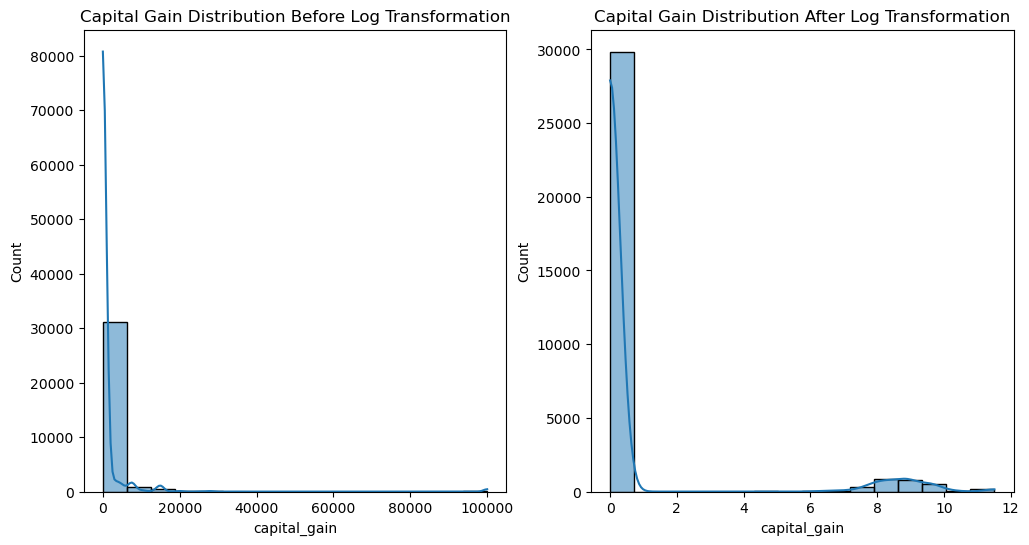

In [39]:
# Visualize the effect of log transformation on capital_gain
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(ds['capital_gain'], kde=True)
plt.title('Capital Gain Distribution Before Log Transformation')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(ds['capital_gain']), kde=True)
plt.title('Capital Gain Distribution After Log Transformation')

plt.show()

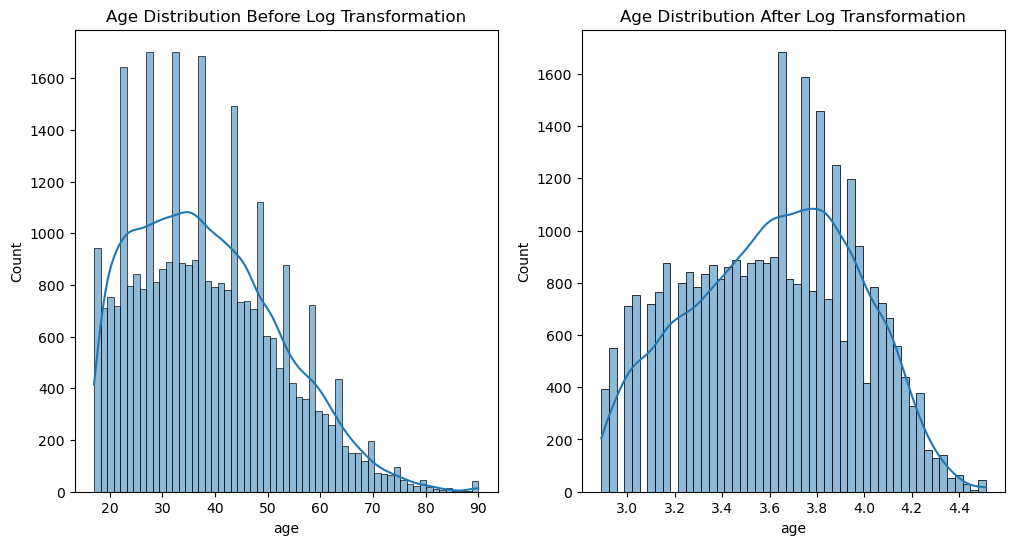

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(ds['age'], kde=True)
plt.title('Age Distribution Before Log Transformation')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(ds['age']), kde=True)
plt.title('Age Distribution After Log Transformation')

plt.show()

In [41]:
#hence we can observe the 3 new features have been created that are has capital loss and has capital gain also the age group columns

In [42]:
#4. Feature Selection:
# Load the dataset
data = pd.read_csv('adult_with_headers.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
# Preprocess the Data
# Handle missing values if there are any
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Train the Isolation Forest Model
model = IsolationForest(contamination=0.1)  # You can adjust the contamination parameter
model.fit(data)

# Detect Anomalies
data['anomaly'] = model.predict(data)
# Anomalies are labeled as -1, normal points are labeled as 1
anomalies = data[data['anomaly'] == -1]

# Evaluate the Results
print("Number of anomalies detected:", len(anomalies))
print(anomalies.head())

Number of anomalies detected: 3256
    age  workclass  fnlwgt  education  education_num  marital_status  \
4    28          4  338409          9             13               2   
6    49          4  160187          6              5               3   
8    31          4   45781         12             14               4   
11   30          7  141297          9             13               2   
14   40          4  121772          8             11               2   

    occupation  relationship  race  sex  capital_gain  capital_loss  \
4           10             5     2    0             0             0   
6            8             1     2    0             0             0   
8           10             1     4    0         14084             0   
11          10             0     1    1             0             0   
14           3             0     1    1             0             0   

    hours_per_week  native_country  income  anomaly  
4               40               5       0       -1

In [47]:
data1 = pd.read_csv('adult_with_headers.csv')
# Step 1: Outlier Detection using Isolation Forest

# Select numerical features for outlier detection
num_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [48]:
# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data['outliers'] = isolation_forest.fit_predict(data[num_features])

In [49]:
# Remove outliers
data_cleaned = data[data['outliers'] == 1].drop(columns=['outliers'])
data_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,anomaly
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,1
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0,1
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0,1
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0,1


In [50]:
#Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [51]:
# Discuss how outliers can affect model performance.
# Skewing Results: Outliers can distort the overall distribution of the data,
# leading to biased parameter estimates.
# Reduced Accuracy: Models may overfit to the outliers, focusing on these extreme values rather than the underlying patterns in the majority of the data. 
# This can lead to inaccurate predictions for new, unseen data.
# Increased Variance: Outliers can increase the variance of the model, making it less stable and more sensitive to small changes in the training data.
# This can result in poor generalization to new data.
# Misleading Conclusions: Outliers can lead to incorrect conclusions about the data. For instance, they might suggest a relationship between variables
# that doesn’t actually exist, or mask a true relationship.
# Compromised Model Performance: In classification tasks, outliers can affect the decision boundary, leading to misclassifications. In clustering,
# they can distort the cluster centroids, resulting in poor clustering performance.

In [52]:
# Step 2: Calculate PPS matrix
pps_matrix = pps.matrix(data_cleaned)[['x', 'y', 'ppscore']].pivot(columns='y', index='x', values='ppscore')
pps_matrix.fillna(0, inplace=True)

In [63]:
#observing correlations
k=data_cleaned.corr().head()

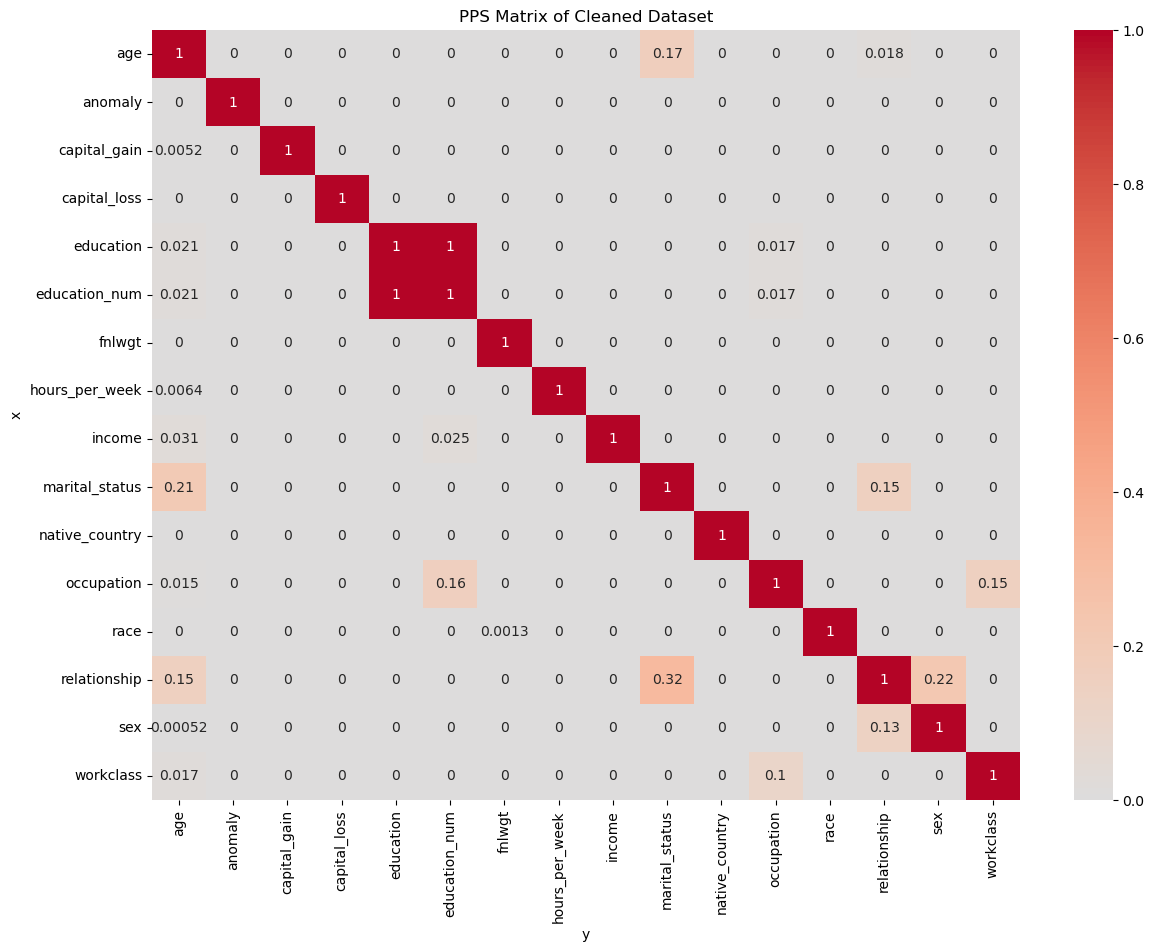

In [56]:
# Visualize PPS matrix
plt.figure(figsize=(14, 10))
sns.heatmap(pps_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('PPS Matrix of Cleaned Dataset')
plt.show()

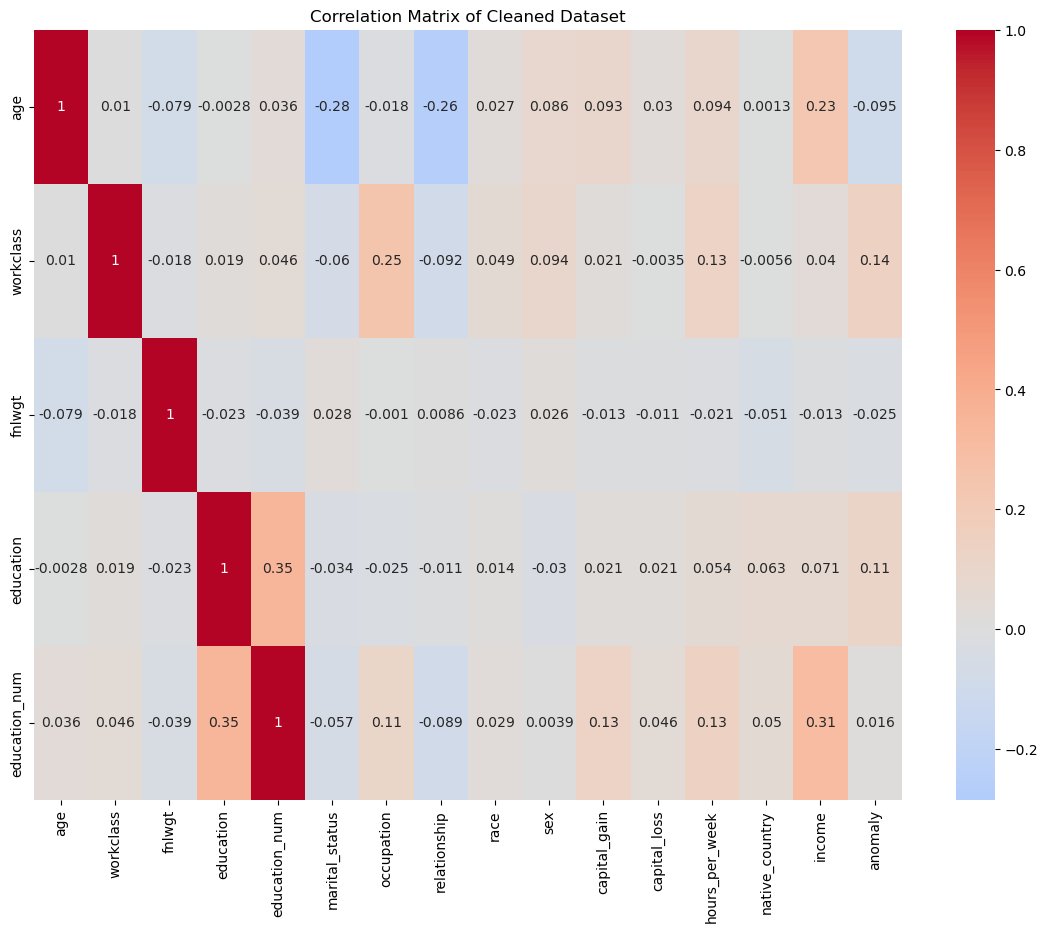

In [64]:
# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(k, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cleaned Dataset')
plt.show()